# Random Forest Classification

Here in this project we want to do a project with Random Forest:

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz



## Upload Dataset

This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit. We are going to store this dataset in a variable called bank_data.

In [2]:
bank_data = pd.read_csv("./Data/bank-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


now we check the info of the data:

## EDA

Dataset consists of 17 columns, including both numerical and categorical features. Key features include:

- Numerical columns: age, balance, day, duration, campaign, pdays, previous
- Categorical columns: job, marital, education, default, housing, loan, contact, month, poutcome, y (target variable)

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
bank_data['default'].unique()

array(['no', 'yes'], dtype=object)

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Text(0.5, 1.0, 'Distribution of Target label')

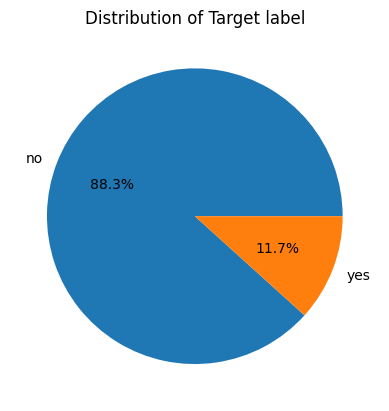

In [8]:
plt.pie(bank_data["y"].value_counts(), autopct='%1.1f%%', labels = ["no","yes"])
plt.title("Distribution of Target label")

So 88.3% of target value has the value of NO
and other are Yes

/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_13831/3749436737.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_13831/3749436737.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_13831/3749436737.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_13831/3749436737.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of t

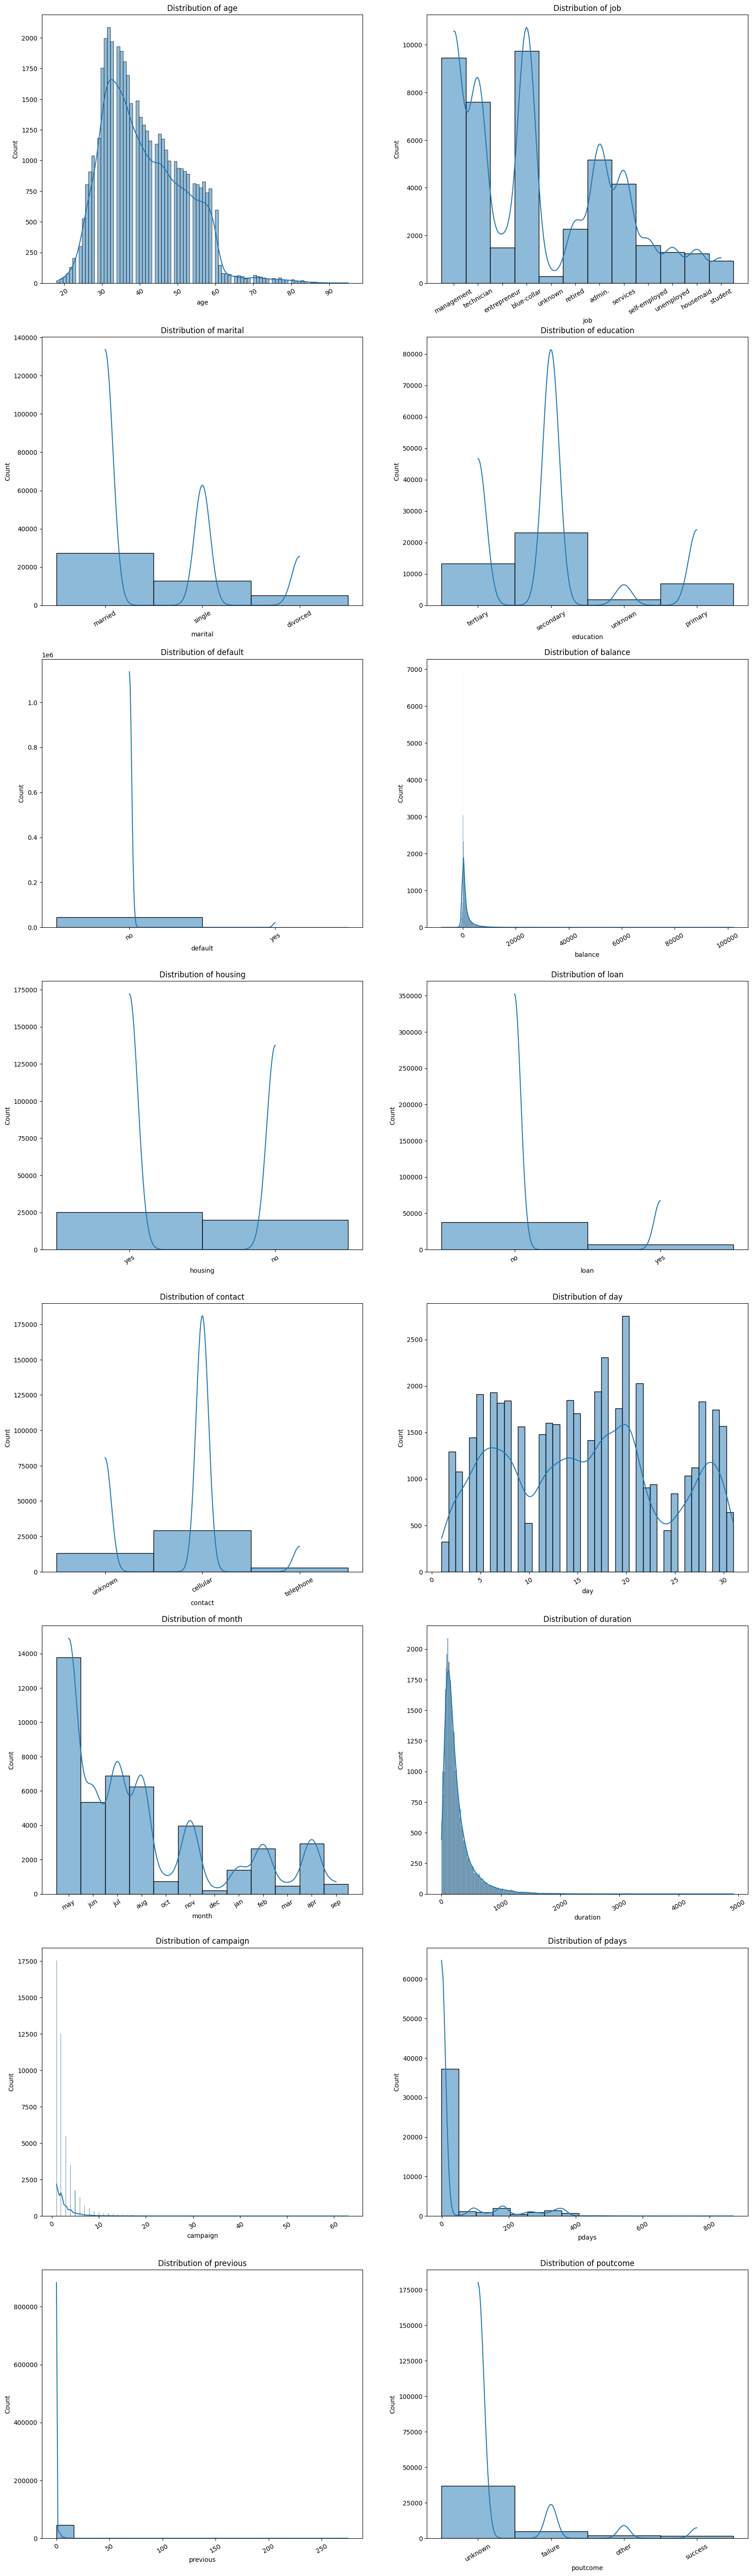

In [9]:
fig, axes = plt.subplots(8, 2, figsize=(20, 72))

fnames = bank_data.columns
a = 0
b = 0

for column in fnames[:-1]:
    if b == 2:
        b = 0
        a += 1
    
    sns.histplot(data=bank_data[column], kde=True, ax = axes[a,b])
    axes[a,b].set_title(f"Distribution of {column}")
    axes[a,b].set_xticklabels(axes[a,b].get_xticklabels(), rotation=30)
    b += 1
plt.show()

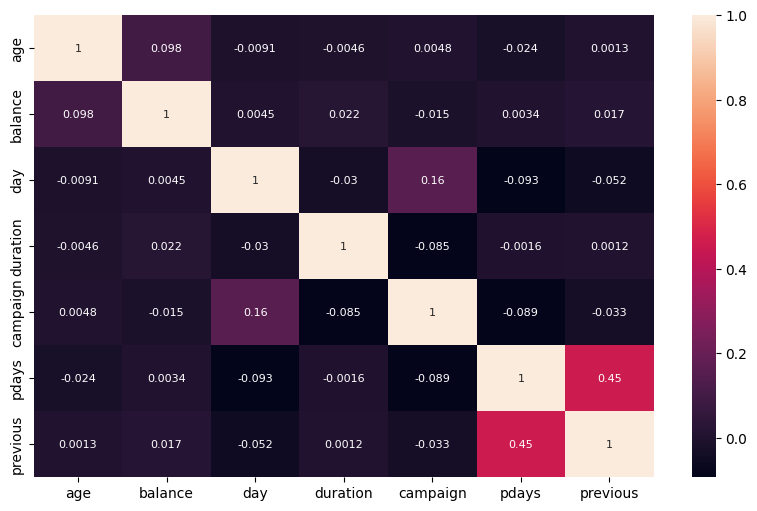

In [10]:
corr_df = bank_data[["age","balance","day","duration","campaign","pdays","previous"]]

correlation_matrix = corr_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, annot_kws={'size': 8})
plt.show()

There are no large positive or large negative correlations.
The highest correlation is between pdays and previous, but it’s not significant enough to be a problem (it doesn’t cause feature duplication).

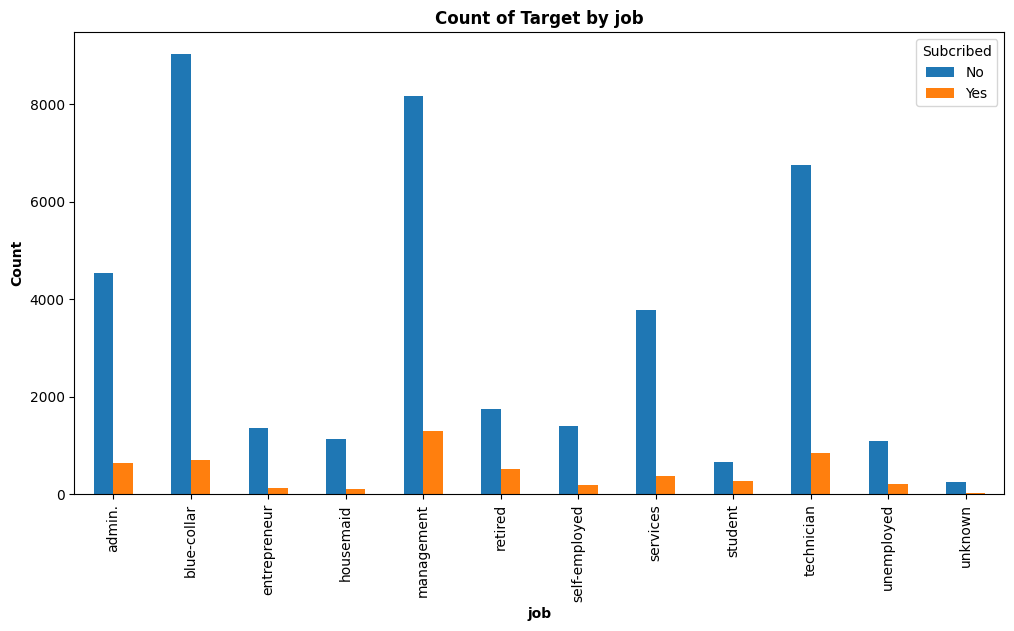

In [11]:
names = ["job","marital","education","default","housing","loan","contact","poutcome", "month"]

def categoricdist(name):
    t = bank_data.groupby([name,"y"]).size().unstack(fill_value=0)
    t.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel(name, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title(f'Count of Target by {name}', fontweight='bold')
    plt.legend(title='Subcribed', labels=['No', 'Yes'])
    plt.show()
    
categoricdist("job")

## Preprocessing Data for Random Forests


- We will map our ‘default’ column, which contains no and yes, to 0s and 1s, respectively. We will treat unknown values as no for this example.
- We will also map our target, y, to 1s and 0s.

In [12]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


We should convert the categorical columns to numerical ones to use them as features in RandomForest:

In [13]:
# One-Hot Encoding for categorical features
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Splitting the Data
When training any supervised learning model, it is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. The test data is used to evaluate the performance of the model.

The code below splits the data into separate variables for the features and target, then splits into training and test data.

In [14]:
# Split the data into features (X) and target (y)
features = bank_data.drop('y', axis=1)
target = bank_data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Fitting and Evaluating the Model


We first create an instance of the Random Forest model, with the default parameters. We then fit this to our training data. We pass both the features and the target variable, so the model can learn.

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

At this point, we have a trained Random Forest model, but we need to find out whether it is making accurate predictions.

In [16]:
y_pred = rf.predict(X_test)

The simplest way to evaluate this model is using accuracy; we check the predictions against the actual values in the test set and count up how many the model got right.

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.906668141103616


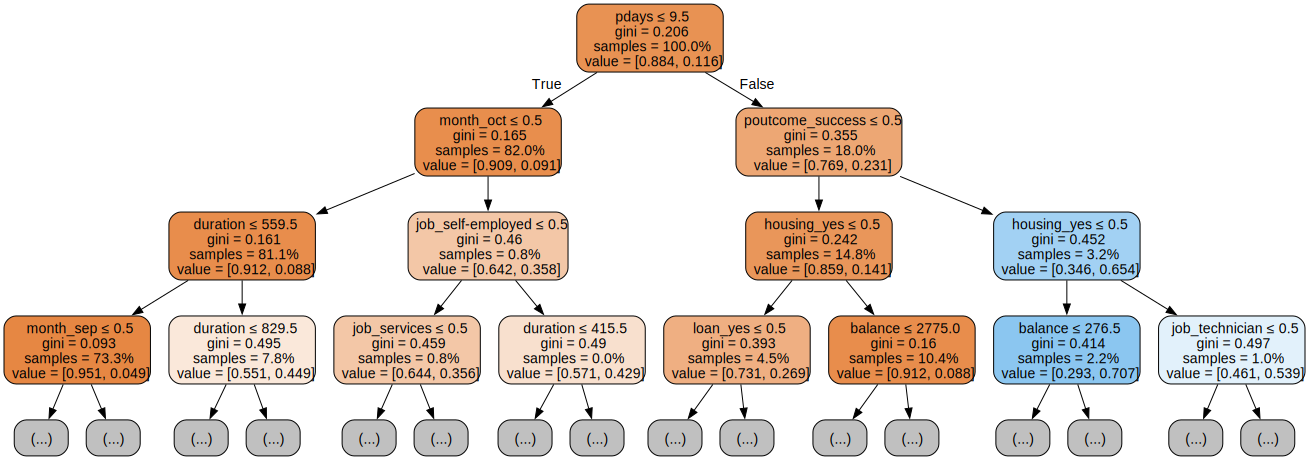

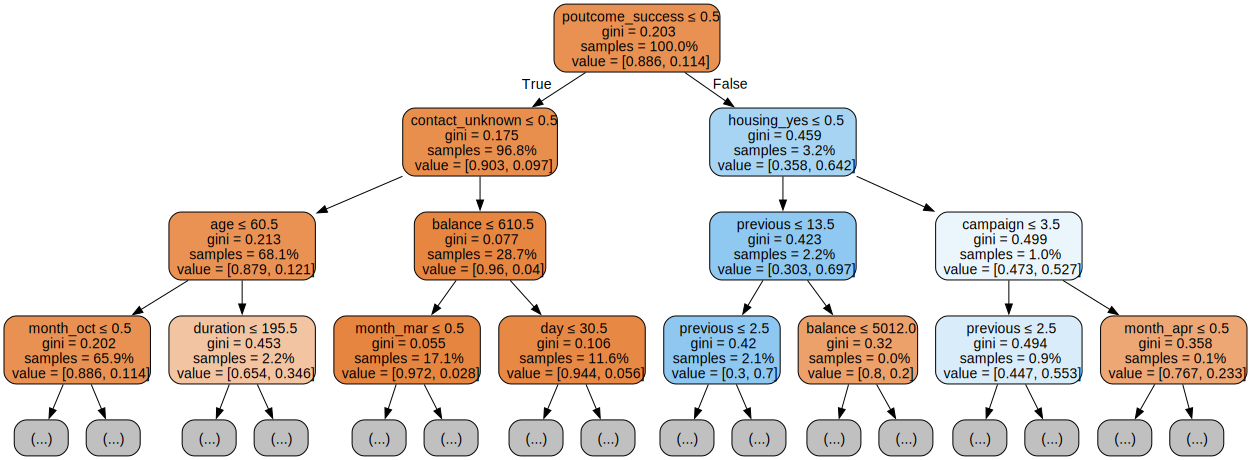

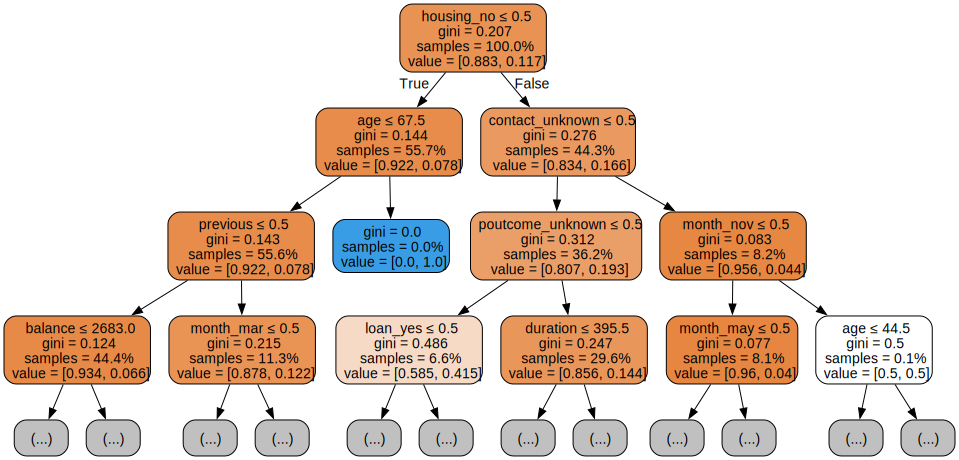

In [18]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Assuming rf is your trained random forest model and X_train is your training data

for i in range(3):  # Iterate over the first three trees
    tree = rf.estimators_[i]
    
    # Export tree in dot format using graphviz
    dot_data = export_graphviz(tree, 
                               out_file=None, 
                               feature_names=X_train.columns, 
                               filled=True, 
                               rounded=True, 
                               special_characters=True, 
                               max_depth=3,   # You can adjust this to visualize deeper trees
                               impurity=True, 
                               proportion=True)
    
    # Create a Graphviz source object and display it
    graph = graphviz.Source(dot_data)
    display(graph)


Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (no subscription) and blue indicating majority 1 (subscription). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:

- The variable name and value used for splitting
- The % of total samples in each split
- The % split between classes in each split

## Hyperparameter Tuning


- n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
- max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.



In [21]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16d50d220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16d5428b0>})

In [22]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 95}


This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives and false negatives. We can plot the confusion matrix using this code:

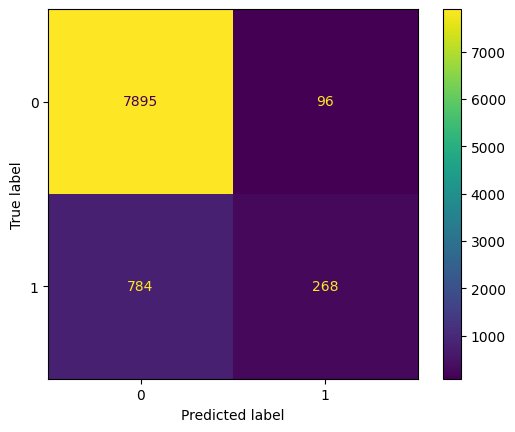

In [23]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

We should also evaluate the best model with accuracy, precision, and recall

In [25]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9026871613402632
Precision: 0.7362637362637363
Recall: 0.25475285171102663


## Feature Importance

We can also find the feature importance of the fetures based on Random Forest Coefficents.